In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
# #taking data from yahoo finance
# start = '2015-01-01'
# end = '2026-01-01'
# stock = 'GOOG'

# data = yf.download(stock, start, end)

In [39]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define available stock options
stocks = {
    'Google (GOOGL)': 'GOOGL',
    'Apple (AAPL)': 'AAPL',
    'Microsoft (MSFT)': 'MSFT',
    'Amazon (AMZN)': 'AMZN',
    'Tesla (TSLA)': 'TSLA',
    'NVDIA (NVDA)': 'NVDA',
    'Reliance (RELIANCE.NS)': 'RELIANCE.NS',
    'TCS (TCS.NS)': 'TCS.NS',
    'Tata Motors (TATAMOTORS.NS)': 'TATAMOTORS.NS'
}

# Create dropdown widget
stock_selector = widgets.Dropdown(
    options=list(stocks.keys()),
    description='Choose Stock:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

output_stock = widgets.Output()

def on_stock_change(change):
    with output_stock:
        clear_output()
        selected_stock_name = change['new']
        selected_symbol = stocks[selected_stock_name]
        print(f"📈 Fetching data for: {selected_stock_name} ({selected_symbol})...")
        global data, start, end, stock  # make 'data', 'start', 'end', and 'stock' available to rest of notebook
        stock = selected_symbol # Update the global stock variable
        start = '2015-01-01' # Define start date
        end = '2026-01-01' # Define end date
        data = yf.download(selected_symbol, start=start, end=end)
        display(data.tail())

# Attach callback
stock_selector.observe(on_stock_change, names='value')

# Display dropdown and output
display(stock_selector, output_stock)

# Trigger initial selection to load data on notebook run
on_stock_change({'new': list(stocks.keys())[0]})

Dropdown(description='Choose Stock:', layout=Layout(width='50%'), options=('Google (GOOGL)', 'Apple (AAPL)', '…

Output()

In [40]:
data

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2015-01-01,190.758667,191.639525,189.845584,190.414929,2963643
2015-01-02,190.253784,192.509638,189.985239,190.801631,7331366
2015-01-05,188.169785,191.403172,187.793807,190.135595,10103941
2015-01-06,179.629807,187.557498,178.748949,186.912974,18627980
2015-01-07,183.539948,184.506740,179.823178,179.844662,20720312
...,...,...,...,...,...
2025-07-07,1541.500000,1544.800049,1525.000000,1526.599976,7251074
2025-07-08,1537.599976,1544.900024,1530.199951,1536.000000,7171261


In [41]:
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
0,2015-01-01,190.758667,191.639525,189.845584,190.414929,2963643
1,2015-01-02,190.253784,192.509638,189.985239,190.801631,7331366
2,2015-01-05,188.169785,191.403172,187.793807,190.135595,10103941
3,2015-01-06,179.629807,187.557498,178.748949,186.912974,18627980
4,2015-01-07,183.539948,184.506740,179.823178,179.844662,20720312
...,...,...,...,...,...,...
2594,2025-07-07,1541.500000,1544.800049,1525.000000,1526.599976,7251074
2595,2025-07-08,1537.599976,1544.900024,1530.199951,1536.000000,7171261
2596,2025-07-09,1519.000000,1551.000000,1510.099976,1536.699951,8870660


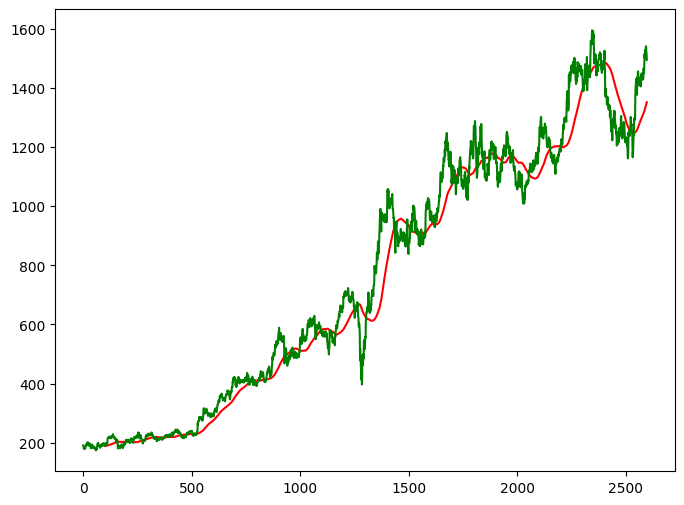

In [42]:
#moving average 100 days
ma_100_days=data.Close.rolling(100).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

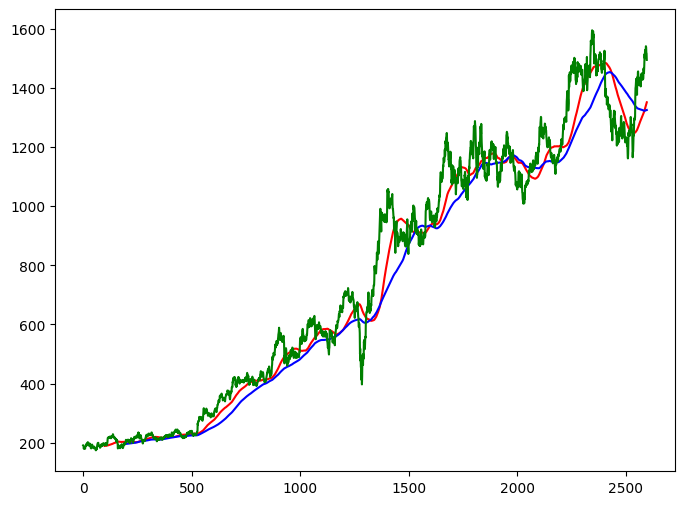

In [43]:
#moving average of 200 days
ma_200_days=data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [44]:
data.dropna(inplace=True)

In [45]:
#80% training data 20%test data
data_train=pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close.iloc[int(len(data)*0.80):len(data)])

In [46]:
data_train.shape[0]

2079

In [47]:
data_test.shape[0]

520

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [49]:
data_train_scale= scaler.fit_transform(data_train)

In [50]:
#array slicing -take 100 data and pred 101th data- of training data

x=[]
y=[]

for  i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [51]:
x,y=np.array(x),np.array(y)

In [52]:
from keras.layers import Dense ,Dropout ,LSTM
from keras.models import Sequential

In [53]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 112ms/step - loss: 0.1272
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0121
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0109
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0089
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0078
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0072
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0076
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0077
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0068
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0076
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0060
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0058
Epoch 13/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0058
Epoch 14/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0057
Epoch 15/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0056
Ep

In [55]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [56]:
pas_100_days=data_train.tail(100)

In [57]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [58]:
data_test

Ticker,RELIANCE.NS
0,1152.239014
1,1162.711548
2,1190.164795
3,1172.565430
4,1157.784790
...,...
615,1541.500000
616,1537.599976
617,1519.000000
618,1517.199951


In [59]:
data_test_scale=scaler.fit_transform(data_test)

In [60]:
#array sclicing of test data
x=[]
y=[]

for  i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [61]:
y_predict=model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step


In [62]:
y_predict

array([[0.2166651 ],
       [0.21840867],
       [0.2199643 ],
       [0.22135976],
       [0.22262518],
       [0.22377543],
       [0.22481993],
       [0.22579516],
       [0.22676578],
       [0.2278078 ],
       [0.22903979],
       [0.2305239 ],
       [0.23235308],
       [0.23457606],
       [0.23712163],
       [0.2398251 ],
       [0.24248314],
       [0.24495535],
       [0.24722068],
       [0.24931787],
       [0.25147986],
       [0.25394696],
       [0.2568756 ],
       [0.2605274 ],
       [0.26511532],
       [0.2713799 ],
       [0.28030795],
       [0.2925108 ],
       [0.3094159 ],
       [0.33016166],
       [0.3524011 ],
       [0.3742234 ],
       [0.3944182 ],
       [0.4123734 ],
       [0.42604414],
       [0.43345287],
       [0.43421587],
       [0.4297449 ],
       [0.42161193],
       [0.41114768],
       [0.39988837],
       [0.38882607],
       [0.37849447],
       [0.36905307],
       [0.36072475],
       [0.35394734],
       [0.34882438],
       [0.345

In [63]:
scale=1/scaler.scale_

In [64]:
y_predict=y_predict*scale

In [65]:
y=y*scale

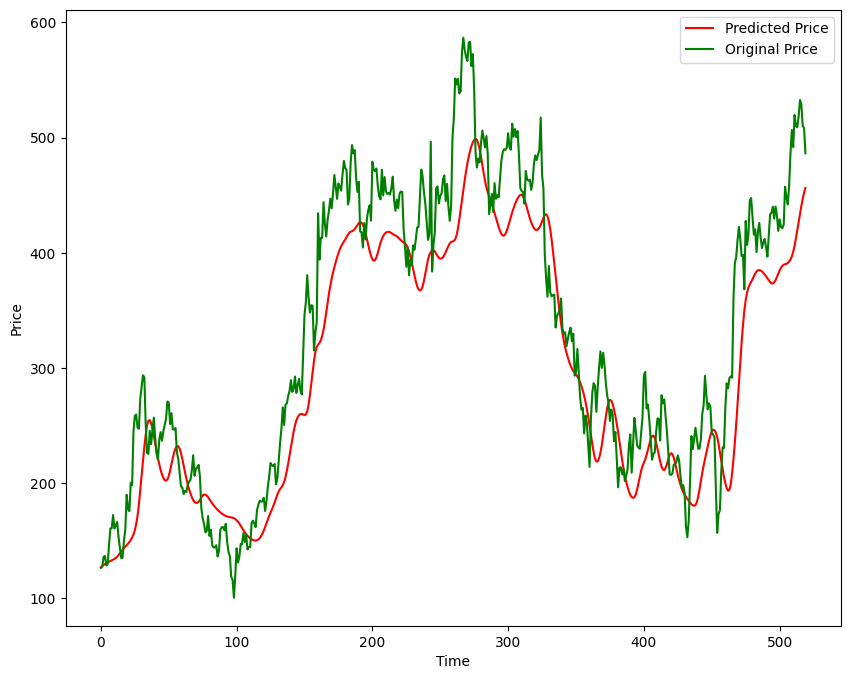

In [66]:
#original vs predicted price
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label="Predicted Price")
plt.plot(y,'g',label="Original Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [67]:
# prompt: also print accuracy percentage

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y, y_predict)
rmse = np.sqrt(mean_squared_error(y, y_predict))
r2 = r2_score(y, y_predict)

# Calculate accuracy percentage (using R-squared as a proxy for explanatory power)
# R-squared indicates how well the model explains the variance in the target variable.
# While not a direct 'accuracy' in terms of classification, it's a common metric
# in regression to gauge how well the predictions fit the actual data.
# We'll present it as a percentage for ease of understanding.
accuracy_percentage = r2 * 100

# print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# print(f"R-squared (R2): {r2:.4f}")
print(f"Accuracy Percentage: {accuracy_percentage:.2f}%")

Accuracy Percentage: 82.92%


In [68]:
#predicting 7 days price
from sklearn.preprocessing import MinMaxScaler

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
df = data[['Close']]

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)


In [69]:

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(df_scaled, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [70]:
#small model to predict 7 days price
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=32)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0323
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.9119e-04
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.5143e-04
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.5663e-04
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.2263e-04
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.2864e-04
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.0091e-04
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.8365e-04
Epoch 9/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.1219e-04
Epoch 10/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.8676e-04
Epoch 11/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.5996e-04
Epoch 12/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.1895e-04
Epoch 13/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.4672e-04
Epoch 14/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.9365e-04
Epoch 15/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s

In [71]:
#7days
n_future_days = 7
last_window = df_scaled[-window_size:].reshape(1, window_size, 1)
future_predictions = []

for _ in range(n_future_days):
    next_pred = model.predict(last_window)[0][0]
    future_predictions.append(next_pred)
    last_window = np.append(last_window[:, 1:, :], [[[next_pred]]], axis=1)

future_predictions_actual = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


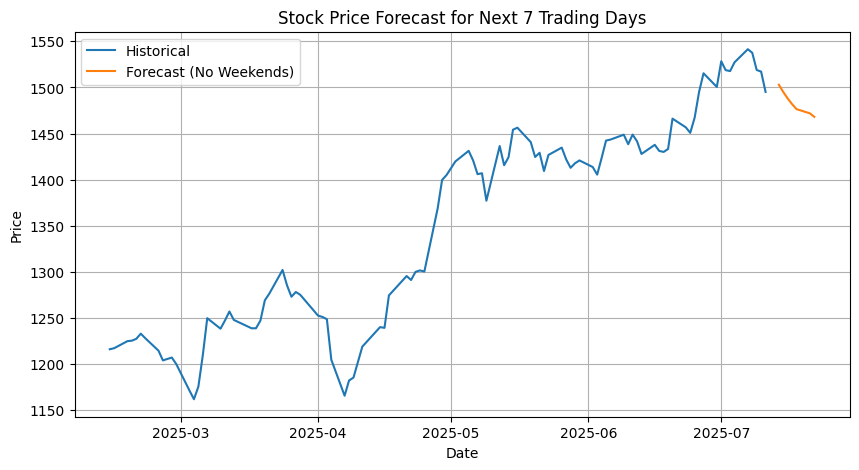

In [72]:
# Plotting next 7 business days price forecast
import matplotlib.pyplot as plt
import pandas as pd

# Generate next 7 business (trading) days
future_dates = list(pd.bdate_range(start=df.index[-1] + pd.Timedelta(days=1), periods=n_future_days))

plt.figure(figsize=(10, 5))
plt.plot(df.index[-100:], df.Close[-100:], label='Historical')
plt.plot(future_dates, future_predictions_actual, label='Forecast (No Weekends)')
plt.legend()
plt.title('Stock Price Forecast for Next 7 Trading Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


/tmp/ipython-input-73-4053283971.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  live_data = yf.download(stock, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


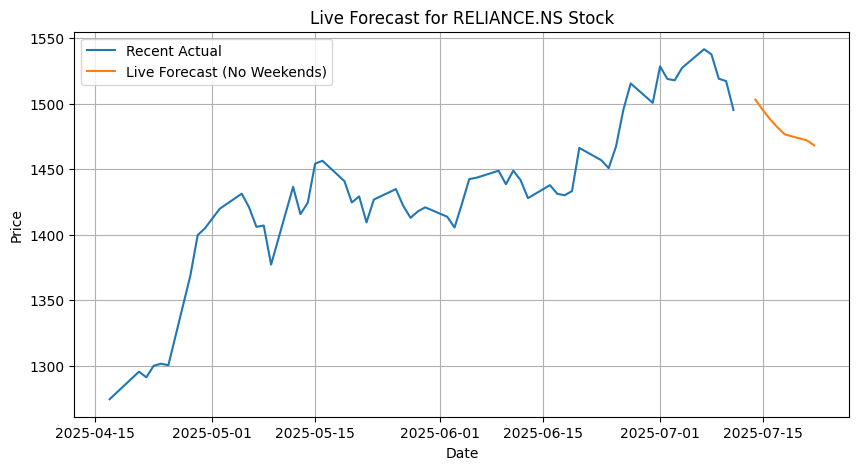

[[1502.9902]
 [1495.1233]
 [1488.0558]
 [1481.8503]
 [1476.5049]
 [1471.9681]
 [1468.1578]]


In [73]:
# Live predicting of price of future trading days
import datetime

end_date = datetime.datetime.now().date()
start_date = end_date - datetime.timedelta(days=100)

# Download last 100 days of stock data
live_data = yf.download(stock, start=start_date, end=end_date)
live_data.reset_index(inplace=True)
live_data.set_index('Date', inplace=True)

# Prepare and scale
live_df = live_data[['Close']]
live_scaled = scaler.transform(live_df)

# Use last window for prediction
last_window_live = live_scaled[-window_size:].reshape(1, window_size, 1)

# Predict next N business days
live_predictions = []

for _ in range(n_future_days):
    next_pred = model.predict(last_window_live)[0][0]
    live_predictions.append(next_pred)
    last_window_live = np.append(last_window_live[:, 1:, :], [[[next_pred]]], axis=1)

live_predictions_actual = scaler.inverse_transform(np.array(live_predictions).reshape(-1, 1))

# Generate next 7 business days
last_live_date = live_df.index[-1]
live_future_dates = list(pd.bdate_range(start=last_live_date + pd.Timedelta(days=1), periods=n_future_days))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(live_df.index[-60:], live_df.Close[-60:], label='Recent Actual')
plt.plot(live_future_dates, live_predictions_actual, label='Live Forecast (No Weekends)')
plt.title(f'Live Forecast for {stock} Stock')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

print(live_predictions_actual)


In [74]:
# Predicting price of 7 business days using a dropdown

import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd

# Build future DataFrame with business days only
try:
    future_data = pd.DataFrame({
        "Date": pd.bdate_range(start=df.index[-1] + pd.Timedelta(days=1), periods=7),
        "Predicted Price": live_predictions_actual.flatten()
    })
except Exception as e:
    print("Error generating prediction view:", e)
    raise

# Widget to select a date
date_selector = widgets.Dropdown(
    options=[(str(date.date()), i) for i, date in enumerate(future_data["Date"])],
    description='Select Date:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

output = widgets.Output()

def on_date_change(change):
    with output:
        clear_output()
        idx = change['new']
        selected_row = future_data.iloc[idx]
        print(f"Prediction for {selected_row['Date'].date()}: ₹{selected_row['Predicted Price']:.2f}")

date_selector.observe(on_date_change, names='value')

display(date_selector, output)
on_date_change({'new': 0})  # Show first prediction by default


Dropdown(description='Select Date:', layout=Layout(width='50%'), options=(('2025-07-14', 0), ('2025-07-15', 1)…

Output()